# AT3 Group 11 - Targeting customers most likely to have a significant increase in spending in the next 3 months
**Name**: Azana Khan <br>
**Student Id** : 14106710
## Aim
Helping Sales Team to target customers most likely to have a significant increase in spending in the next 3 months 

### Importing and Exploring the data

In [1]:
import pandas as pd
import numpy as np

## for visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# for datetime column
from datetime import datetime, date

# avoid the warning display
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data
df = pd.read_csv('C:/Users/Yashmita/Desktop/transactions/df.csv')

In [3]:
df.shape

(4260921, 24)

In [4]:
df.head()

,Unnamed: 0,ssn,cc_num,first,last,gender,street,city,state,zip,...,dob,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,...,1959-10-03,888022315787,91ab12e73ef38206e1121e9648d2408d,1.558720e+09,gas_transport,69.12,0.0,Phillips Group,39.491416,-75.588522
1,1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,...,1959-10-03,888022315787,071553d533a6822a4431c354c434ddcb,1.569426e+09,grocery_pos,68.11,0.0,Tucker Ltd,40.890319,-75.573359
2,2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,...,1959-10-03,888022315787,0cfad38ef15e4749eff68dc83f62c151,1.577206e+09,misc_net,40.35,0.0,Dixon PLC,39.244958,-74.475327
3,3,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,...,1959-10-03,888022315787,5782693d7c70f062f258cb30bfa8900f,1.571428e+09,grocery_pos,96.22,0.0,Lambert-Cooper,39.656925,-75.802342
4,4,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,...,1959-10-03,888022315787,35fd7db657d7e30dd608c37f7798186e,1.549840e+09,gas_transport,71.89,0.0,Griffith LLC,40.313342,-74.220434


In [5]:
# Check the column names and data types
print(df.dtypes)

Unnamed: 0      int64
ssn            object
cc_num          int64
first          object
last           object
gender         object
street         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
dob            object
acct_num        int64
trans_num      object
unix_time     float64
category       object
amt           float64
is_fraud      float64
merchant       object
merch_lat     float64
merch_long    float64
dtype: object


#### Treating Missing Values

In [6]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0     0
ssn            0
cc_num         0
first          0
last           0
gender         0
street         0
city           0
state          0
zip            0
lat            0
long           0
city_pop       0
job            0
dob            0
acct_num       0
trans_num     17
unix_time     17
category      17
amt           17
is_fraud      17
merchant      17
merch_lat     17
merch_long    17
dtype: int64


In [7]:
# Handling missing values
df = df.dropna()  # Remove rows with missing values, or you can impute missing values if appropriate

#### Relevant Features considering our aim

In [8]:
# Identify relevant features for predicting spending increase
relevant_features = ['cc_num', 'gender', 'job', 'dob', 'Category', 'amt']  # Add other relevant columns as needed

#### Dealing with duplicates

In [9]:
# Handling duplicate records
df = df.drop_duplicates()  # Remove duplicate records if necessary

#### Converting categorical data to numerical data

In [10]:
# Convert categorical variables
categorical_cols = ['gender', 'job']  # Add other categorical columns as needed

In [11]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### Scaling numerical features

In [12]:
# Normalize numerical features
numerical_cols = ['amt', 'lat', 'long', 'merch_lat', 'merch_long']  # Add other numerical columns as needed

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [14]:
# Final preprocessed dataset
preprocessed_df = df_encoded

In [15]:
preprocessed_df.shape

(4260904, 527)

In [16]:
preprocessed_df.head()

,Unnamed: 0,ssn,cc_num,first,last,street,city,state,zip,lat,...,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Wellsite geologist,job_Writer,job_Youth worker
0,0,115-04-4507,4218196001337,Jonathan,Johnson,863 Lawrence Valleys,Ambler,PA,19002,0.516629,...,0,0,0,0,0,0,0,0,0,0
1,1,115-04-4507,4218196001337,Jonathan,Johnson,863 Lawrence Valleys,Ambler,PA,19002,0.516629,...,0,0,0,0,0,0,0,0,0,0
2,2,115-04-4507,4218196001337,Jonathan,Johnson,863 Lawrence Valleys,Ambler,PA,19002,0.516629,...,0,0,0,0,0,0,0,0,0,0
3,3,115-04-4507,4218196001337,Jonathan,Johnson,863 Lawrence Valleys,Ambler,PA,19002,0.516629,...,0,0,0,0,0,0,0,0,0,0
4,4,115-04-4507,4218196001337,Jonathan,Johnson,863 Lawrence Valleys,Ambler,PA,19002,0.516629,...,0,0,0,0,0,0,0,0,0,0


### Feature Engineering

In [17]:
from datetime import datetime

# Calculate aggregate statistics from transaction history
agg_df = df.groupby('ssn').agg({'amt': ['sum', 'mean', 'count']})
agg_df.columns = ['total_spending', 'avg_spending_per_transaction', 'transaction_count']
df = df.merge(agg_df, on='ssn', how='left')

In [18]:
# Extract age from date of birth (dob)
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (datetime.now() - df['dob']).astype('<m8[Y]')

In [19]:
# Define age groups based on age
def get_age_group(age):
    if age < 18:
        return 'Under 18'
    elif age < 30:
        return '18-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60+'

df['age_group'] = df['age'].apply(get_age_group)

In [20]:
# Drop unnecessary columns
df.drop(['dob', 'ssn'], axis=1, inplace=True)

In [21]:
# Final dataset with engineered features
final_df = df

### Target Variable

In [22]:
# Define the threshold for a significant spending increase
threshold_increase = 1000  # Replace with your desired threshold

In [23]:
# Calculate the spending increase for each customer over the next 3 months
df['spending_increase'] = df.groupby('acct_num')['amt'].diff(periods=-3)  # Assuming the dataset is sorted by date

In [24]:
# Create the target variable indicating whether a customer has a significant spending increase or not
df['target'] = (df['spending_increase'] > threshold_increase).astype(int)

In [25]:
# Drop rows with missing values in the target variable
df = df.dropna(subset=['target'])


In [26]:
# Final dataset with the target variable
final_df = df

In [27]:
final_df.shape

(4260904, 29)

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260904 entries, 0 to 4260903
Data columns (total 29 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   cc_num                        int64  
 2   first                         object 
 3   last                          object 
 4   gender                        object 
 5   street                        object 
 6   city                          object 
 7   state                         object 
 8   zip                           int64  
 9   lat                           float64
 10  long                          float64
 11  city_pop                      int64  
 12  job                           object 
 13  acct_num                      int64  
 14  trans_num                     object 
 15  unix_time                     float64
 16  category                      object 
 17  amt                           float64
 18  is_fraud              

### Dropping irrelevant columns

In [29]:
columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long',
                   'city_pop', 'job', 'trans_num', 'unix_time', 'is_fraud', 'merchant', 'merch_lat', 'merch_long']

final_df = final_df.drop(columns_to_drop, axis=1)

In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260904 entries, 0 to 4260903
Data columns (total 11 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   gender                        object 
 1   acct_num                      int64  
 2   category                      object 
 3   amt                           float64
 4   total_spending                float64
 5   avg_spending_per_transaction  float64
 6   transaction_count             int64  
 7   age                           float64
 8   age_group                     object 
 9   spending_increase             float64
 10  target                        int32  
dtypes: float64(5), int32(1), int64(2), object(3)
memory usage: 373.8+ MB


### Preparing the dataset for training

In [31]:
# Convert categorical variables
df_encoded = pd.get_dummies(final_df, columns=['gender', 'category', 'age_group'])
# Verify the updated DataFrame
print(df_encoded.head())

       acct_num    amt  total_spending  avg_spending_per_transaction  \
0  888022315787  69.12        206986.2                     63.144051   
1  888022315787  68.11        206986.2                     63.144051   
2  888022315787  40.35        206986.2                     63.144051   
3  888022315787  96.22        206986.2                     63.144051   
4  888022315787  71.89        206986.2                     63.144051   

   transaction_count   age  spending_increase  target  gender_F  gender_M  \
0               3278  63.0             -27.10       0         0         1   
1               3278  63.0              -3.78       0         0         1   
2               3278  63.0             -33.23       0         0         1   
3               3278  63.0              38.53       0         0         1   
4               3278  63.0              -2.38       0         0         1   

   ...  category_personal_care  category_shopping_net  category_shopping_pos  \
0  ...                  

In [32]:
print(df_encoded.isnull().sum())

acct_num                           0
amt                                0
total_spending                     0
avg_spending_per_transaction       0
transaction_count                  0
age                                0
spending_increase               2949
target                             0
gender_F                           0
gender_M                           0
category_entertainment             0
category_food_dining               0
category_gas_transport             0
category_grocery_net               0
category_grocery_pos               0
category_health_fitness            0
category_home                      0
category_kids_pets                 0
category_misc_net                  0
category_misc_pos                  0
category_personal_care             0
category_shopping_net              0
category_shopping_pos              0
category_travel                    0
age_group_18-29                    0
age_group_30-39                    0
age_group_40-49                    0
a

In [33]:
df_encoded = df_encoded.dropna()  # Remove rows with missing values, or you can impute missing values if appropriate

## Modelling
### Importing libraries

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Splitting the dataset

In [35]:
# Split the dataset into training and testing sets
X = df_encoded.drop(['target'], axis=1)
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training Logistic Regression

In [36]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

### Predicting

In [37]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

### Evaluation

In [38]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [39]:
# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('ROC-AUC:', roc_auc)

Accuracy: 0.9973449695922103
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.5


## Feature Importance
### Importing libraries

In [40]:
from sklearn.ensemble import RandomForestClassifier
# Create the model
model = RandomForestClassifier()

### Modelling using Random Forest Classifier

In [41]:
# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
# Get feature importances
feature_importances = model.feature_importances_

In [43]:
# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

#### Important features list

In [44]:
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)

                         Feature  Importance
6              spending_increase    0.586534
1                            amt    0.408694
3   avg_spending_per_transaction    0.000864
2                 total_spending    0.000712
4              transaction_count    0.000700
0                       acct_num    0.000635
5                            age    0.000531
20         category_shopping_net    0.000287
17             category_misc_net    0.000100
7                       gender_F    0.000086
21         category_shopping_pos    0.000085
8                       gender_M    0.000061
9         category_entertainment    0.000060
15                 category_home    0.000058
26               age_group_50-59    0.000054
18             category_misc_pos    0.000053
10          category_food_dining    0.000051
13          category_grocery_pos    0.000048
12          category_grocery_net    0.000045
11        category_gas_transport    0.000045
16            category_kids_pets    0.000043
19        

###### The "spending_increase" and "amt" characteristics had the greatest importance ratings, showing their strong influence on forecasting whether customers would have a significant rise in spending, according to the analysis of feature importance. Although to a lesser extent, other characteristics including transaction-related statistics, gender, age, and transaction categories also influence the forecasts.

In [45]:
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [46]:
# Set the threshold or choose top N features
top_n = 10  # Replace with the desired number of top features

In [47]:
# Select the top N features
selected_features = feature_importance_df['Feature'][:top_n].tolist()

In [48]:
# Subset the original dataframe with the selected features
df_selected = df_encoded[selected_features + ['target']]

# Print the selected features
print('Selected Features:', selected_features)

Selected Features: ['spending_increase', 'amt', 'avg_spending_per_transaction', 'total_spending', 'transaction_count', 'acct_num', 'age', 'category_shopping_net', 'category_misc_net', 'gender_F']


#### Further feature Enginering

In [49]:
# Derive new features
df['month'] = pd.to_datetime(df['unix_time']).dt.month
df['day_of_week'] = pd.to_datetime(df['unix_time']).dt.dayofweek

In [ ]:
df['amt'] = pd.to_numeric(df['amt'])
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [72]:
# Create interaction terms between features
df['amt_gender_interaction'] = df['amt'] * df['gender']

In [51]:
# Apply mathematical transformations to numerical features
df['amt_squared'] = df['amt'] ** 2
df['log_amt'] = np.log1p(df['amt'])

#### Normalizing features

In [52]:
# Normalize numerical features
numerical_cols = ['amt', 'amt_squared', 'log_amt']  # Add other numerical columns as needed
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [53]:
# Update the selected features with the new and transformed features
selected_features = ['month', 'day_of_week', 'amt', 'amt_squared', 'log_amt', 'amt_gender_interaction']  # Update with the desired features

In [54]:
# Subset the dataframe with the updated selected features
df_selected = df[selected_features + ['target']]

In [55]:
# Print the updated selected features
print('Updated Selected Features:', selected_features)

Updated Selected Features: ['month', 'day_of_week', 'amt', 'amt_squared', 'log_amt', 'amt_gender_interaction']


#### Sampling Imbalanced data

In [56]:
from imblearn.over_sampling import SMOTE
# Check class distribution
class_distribution = df['target'].value_counts()
print('Class Distribution:')
print(class_distribution)

Class Distribution:
0    4249581
1      11323
Name: target, dtype: int64


In [57]:
# Check if there is a significant class imbalance
if class_distribution[0] / class_distribution[1] > 5:
    # Perform oversampling using SMOTE
    smote = SMOTE()
    X = df_encoded.drop('target', axis=1)
    y = df_encoded['target']
    X_oversampled, y_oversampled = smote.fit_resample(X, y)

    # Create a new DataFrame with the oversampled data
    df_oversampled = pd.concat([X_oversampled, y_oversampled], axis=1)

    # Check the class distribution after oversampling
    class_distribution_oversampled = df_oversampled['target'].value_counts()
    print('Class Distribution after Oversampling:')
    print(class_distribution_oversampled)
else:
    print('Class distribution is balanced. No further action needed.')

Class Distribution after Oversampling:
0    4246632
1    4246632
Name: target, dtype: int64


### Importing libraries

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


#### Training Models for comparison

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

In [60]:
# Create an instance of each model
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()
lgb_model = lgb.LGBMClassifier()
svm_model = SVC()
nn_model = MLPClassifier()

In [61]:
# Fit the models on the training data
logreg_model.fit(X_train, y_train)
logreg_preds = logreg_model.predict(X_test)
# Evaluate the performance of each model
print("Logistic Regression:")
print(classification_report(y_test, logreg_preds))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    849551
           1       0.00      0.00      0.00    849102

    accuracy                           0.50   1698653
   macro avg       0.25      0.50      0.33   1698653
weighted avg       0.25      0.50      0.33   1698653



In [62]:
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("XGBoost:")
print(classification_report(y_test, xgb_preds))

XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    849551
           1       1.00      1.00      1.00    849102

    accuracy                           1.00   1698653
   macro avg       1.00      1.00      1.00   1698653
weighted avg       1.00      1.00      1.00   1698653



In [63]:
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, rf_preds))

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    849551
           1       1.00      1.00      1.00    849102

    accuracy                           1.00   1698653
   macro avg       1.00      1.00      1.00   1698653
weighted avg       1.00      1.00      1.00   1698653



In [64]:
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)
print("LightGBM:")
print(classification_report(y_test, lgb_preds))

LightGBM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    849551
           1       1.00      1.00      1.00    849102

    accuracy                           1.00   1698653
   macro avg       1.00      1.00      1.00   1698653
weighted avg       1.00      1.00      1.00   1698653



In [66]:
print("Logistic Regression:")
print(classification_report(y_test, logreg_preds))
print("Random Forest:")
print(classification_report(y_test, rf_preds))
print("XGBoost:")
print(classification_report(y_test, xgb_preds))
print("LightGBM:")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    849551
           1       0.00      0.00      0.00    849102

    accuracy                           0.50   1698653
   macro avg       0.25      0.50      0.33   1698653
weighted avg       0.25      0.50      0.33   1698653

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    849551
           1       1.00      1.00      1.00    849102

    accuracy                           1.00   1698653
   macro avg       1.00      1.00      1.00   1698653
weighted avg       1.00      1.00      1.00   1698653

XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    849551
           1       1.00      1.00      1.00    849102

    accuracy                           1.00   1698653
   macro avg       1.00      1.00      1.00   1698653
weighted avg       1.00      

### Data Insights

###### Most of our customers lie in the age bracket of 20-50 age group

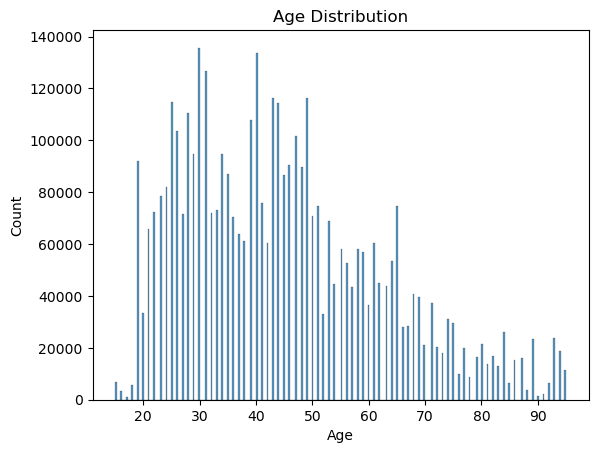

In [97]:
# Age Distribution
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

###### Customers spend most on groceries followed closely by shopping and the least on gas for transport

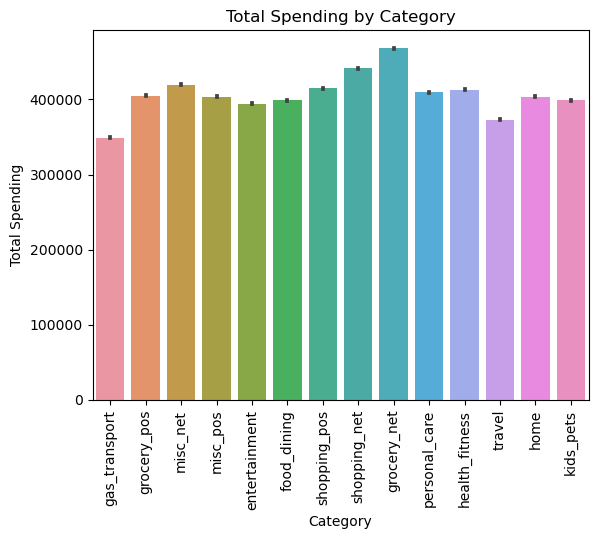

In [98]:

# Total Spending by Category
sns.barplot(x='category', y='total_spending', data=df)
plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=90)
plt.show()

###### The dataset contains the highest category of people spending in food and dining followed closely  by transport andleast number of customers spedning in fitness and travel

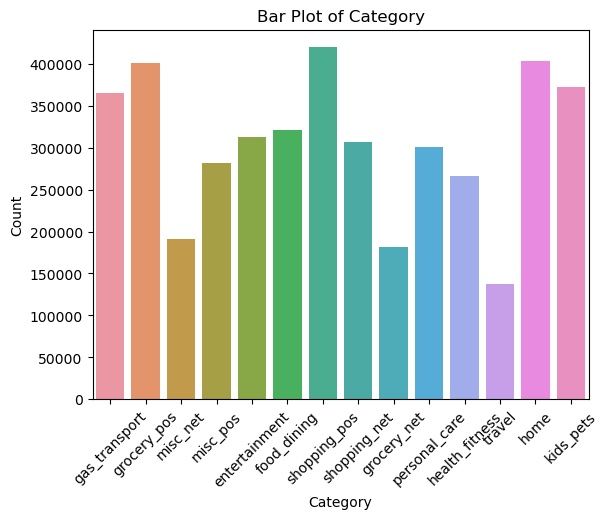

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a bar plot of the 'category' feature
sns.countplot(x='category', data=df)
plt.title('Bar Plot of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
